In [48]:
# K-means clustering algo for unsupervised training/learning
# Source: https://www.youtube.com/watch?v=EItlUEPCIzM&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=15


from sklearn.cluster import KMeans
import pandas as ps
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

iris = load_iris()

# Describing the data set
dir(iris)

irisdf = ps.DataFrame(iris.data)
print(irisdf.head(10))

# Defining targets

targets = ps.DataFrame(iris.target)
targets.shape #head(50)


     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
5  5.4  3.9  1.7  0.4
6  4.6  3.4  1.4  0.3
7  5.0  3.4  1.5  0.2
8  4.4  2.9  1.4  0.2
9  4.9  3.1  1.5  0.1


(150, 1)

In [49]:
#plt.scatter(irisdf[1,2],irisdf[3])



In [54]:
# Using kmeans it assigned labels into numbers.

kmodel = KMeans(n_clusters=3)
y_pred = kmodel.fit_predict(irisdf[[0,1]])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [56]:
#K means cluster centers
print(kmodel.cluster_centers_)

irisdf['cluster'] = y_pred # Assigning cluster numbers back to DF
print(irisdf.head(20))

[[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
      0    1    2    3  cluster
0   5.1  3.5  1.4  0.2        0
1   4.9  3.0  1.4  0.2        0
2   4.7  3.2  1.3  0.2        0
3   4.6  3.1  1.5  0.2        0
4   5.0  3.6  1.4  0.2        0
5   5.4  3.9  1.7  0.4        0
6   4.6  3.4  1.4  0.3        0
7   5.0  3.4  1.5  0.2        0
8   4.4  2.9  1.4  0.2        0
9   4.9  3.1  1.5  0.1        0
10  5.4  3.7  1.5  0.2        0
11  4.8  3.4  1.6  0.2        0
12  4.8  3.0  1.4  0.1        0
13  4.3  3.0  1.1  0.1        0
14  5.8  4.0  1.2  0.2        0
15  5.7  4.4  1.5  0.4        0
16  5.4  3.9  1.3  0.4        0
17  5.1  3.5  1.4  0.3        0
18  5.7  3.8  1.7  0.3        0
19  5.1  3.8  1.5  0.3        0


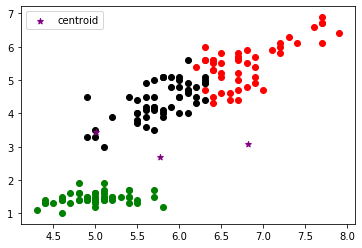

In [57]:
# Seperating each clustered rows into each DF and then plotting 
df1 = irisdf[irisdf.cluster==0]
df2 = irisdf[irisdf.cluster==1]
df3 = irisdf[irisdf.cluster==2]
plt.scatter(df1[0],df1[2],color='green')
plt.scatter(df2[0],df2[2],color='red')
plt.scatter(df3[0],df3[2],color='black')
plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [69]:
# Elbow plot
print(irisdf.head(10))

sse = []
k_rng = range(1,8)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(irisdf[[0,1]])
    sse.append(km.inertia_)

     0    1    2    3  cluster
0  5.1  3.5  1.4  0.2        0
1  4.9  3.0  1.4  0.2        0
2  4.7  3.2  1.3  0.2        0
3  4.6  3.1  1.5  0.2        0
4  5.0  3.6  1.4  0.2        0
5  5.4  3.9  1.7  0.4        0
6  4.6  3.4  1.4  0.3        0
7  5.0  3.4  1.5  0.2        0
8  4.4  2.9  1.4  0.2        0
9  4.9  3.1  1.5  0.1        0


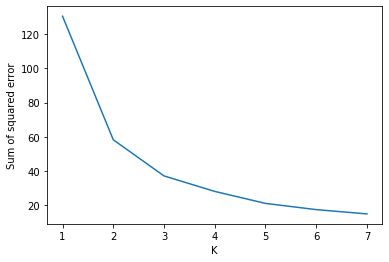

In [70]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#optimal with 8 iterations seen as k=3